_________________________________________________________ 
# 3 Brownian Motion (BM)
_________________________________________________________

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Introduction

- BM is a martingale (MDP) (Theorem 3.3.4)
- accumulates quadratc variation at rate one per unit time (3.4.3)


## 3.2 Scaled Random Walk

### 3.2.1 Symmetric Random Walk

We create a symmetric Random Walk by tossing a fair successively. The are 2 outcomes in that case, where the outcome T has a probability of $p=\frac{1}{2}$ and the outcome H has a probability of $q=1-p$. The outcome of the $n^{th}$ toss is stored by $\omega_{n}$.

$\text{Let}$

$$
X_{j} =
    \begin{cases} 1,& \text{if } \omega_{j} = H\\
    -1,& \text{if } \omega_{j} = T\\
    \end{cases}
$$

$\text{then we can define the symmetric Random Walk } M_{k} \text{ as}$

$$
M_{k} = \sum_{j=1}^{k} X_{j}
$$

$\text{where } M_{0}=0 \text{ and } \text{ k=1,2,3... } .$

The next figure visualizes a symmetric Random Walk:

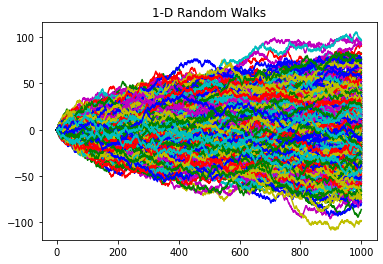

In [17]:
def rw1D(steps, p=0.5): #n here is the no. of steps that we require
    # entry at position k of M is of the form: (k, X_{k-1}+X_{k})
    # with M[0] = (0,0)
    M = [(0,0)]
    
    # go over all n
    for k in range(1,steps+1):
        X_k = 1 if np.random.uniform(0,1) < p else -1
        M.append((k, M[k-1][1]+X_k))
        
    return np.array(M)

# plot 1000 random walks
for _ in range(1000):
    col = np.random.choice(['b-','-g','-r','-c','-m','-y'])
    rw_1 = rw1D(1000, p=0.5)
    plt.plot(rw_1[:,0],rw_1[:,1],col)
        
plt.title("1-D Random Walks")
plt.show()

In [20]:
num_of_losses = 0
num_of_tries = 10000
num_of_steps = 1000
p = 0.55
total_win = 0

for _ in range(num_of_tries):
    val = rw1D(num_of_steps, p=p)[-1,1]
    if val < 0:
        num_of_losses += 1
    total_win += val

    
average_win = total_win/num_of_tries
print(f'We ended up below 0 in {num_of_losses} out of {num_of_tries} number of tries, so {num_of_losses/num_of_tries}%.')
print(f'On average we ended up at {average_win} after {num_of_steps} number of steps.')

We ended up below 0 in 6 out of 10000 number of tries, so 0.0006%.
On average we ended up at 99.8172 after 1000 number of steps.


### 3.2.2 Increments of the Symmetric Random Walk

When we talk about *independent increments* of a Random Walk, then we mean the change in position of the Random Walk between $k_{i}$ and $k_{i+1}$, so

$$
M_{k_{i+1}} - M_{k_{i}} = \sum_{j=k_{i}+1}^{k_{i+1}} X_{j} \text{  .}
$$

Furthermore, we know

$$
E[M_{k_{i+1}} - M_{k_{i}}] = 0
$$

and

$$
Var[M_{k_{i+1}} - M_{k_{i}}] = \sum_{j=k_{i}+1}^{k_{i+1}} Var[X_{j}] = \sum_{j=k_{i}+1}^{k_{i+1}} 1 = k_{i+1} - k_{i}
$$

Word for word like book: "The variance of the symmetric walk accumulates at rate one per unit time, so that the variance of the increment over any time interval $k$ to $l$ for nonnegative integers $k<l$ is $l-k$."

### 3.2.3 Martingale Property for the symmetric Random Walk

- easy for discrete case. Just need to show $\mu=0$
- continous harder. We need to introduce filtration. Video series at: https://www.youtube.com/watch?v=aCFrBOed_7g&list=PLg5nrpKdkk2BZoZYAg2d6Ma3HZ5p9h35i&index=6